In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
pd.set_option("display.max_rows",None)

In [7]:
df=pd.read_excel(r"C:\Users\bolla\OneDrive\Desktop\Data Analyst projects\Mall_Customers.xlsx")

In [8]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df["Gender"].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**The describe() function in pandas is used to generate descriptive statistics of a DataFrame or Series**

For numeric columns, it returns:

count – Number of non-null values

mean – Average value

std – Standard deviation

min – Minimum value

25%, 50%, 75% – Percentiles (quartiles)

max – Maximum value

For object or categorical columns, it returns:

count – Number of non-null values

unique – Number of unique values

top – Most frequent value

freq – Frequency of the most frequent value

✅ Example

**UNIVARIATE ANALYSIS**

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**seaborn.distplot() was used to plot univariate distributions (histogram + KDE curve) in older versions of Seaborn**, but it has been deprecated since Seaborn v0.11.

**sns.histplot() → Histogram**

**sns.kdeplot() → KDE plot**

**sns.displot() → Figure-level distribution plot**



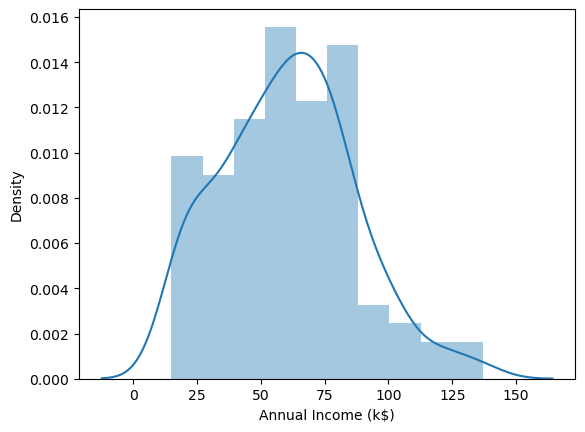

In [13]:
sns.distplot(df['Annual Income (k$)']);

In [14]:
df.columns.tolist()

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

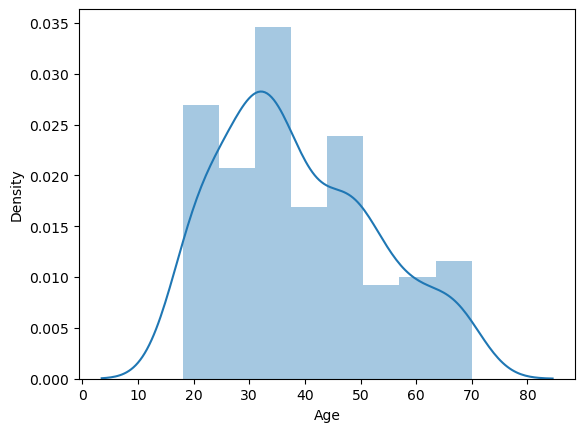

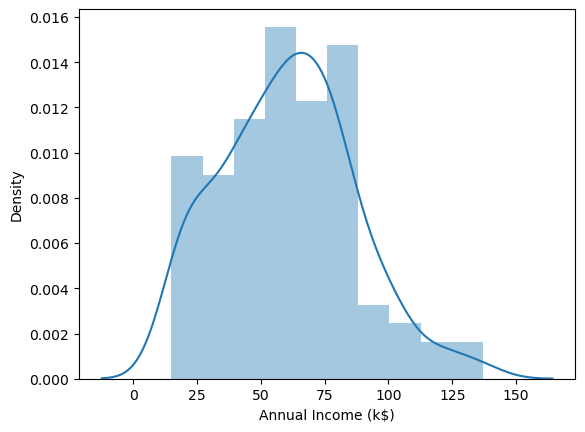

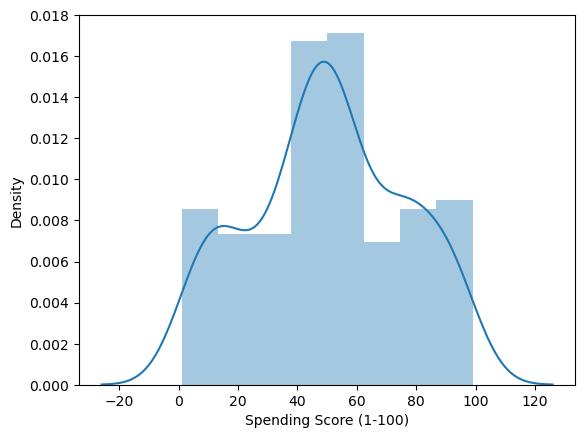

In [15]:
columns=[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

The hue parameter in Seaborn is used to add a categorical dimension to the plot by coloring the data points based on the category.

It helps to differentiate groups visually using colors.

📌 How It Works?

You pass a categorical column to hue.

Seaborn assigns different colors to each category.

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

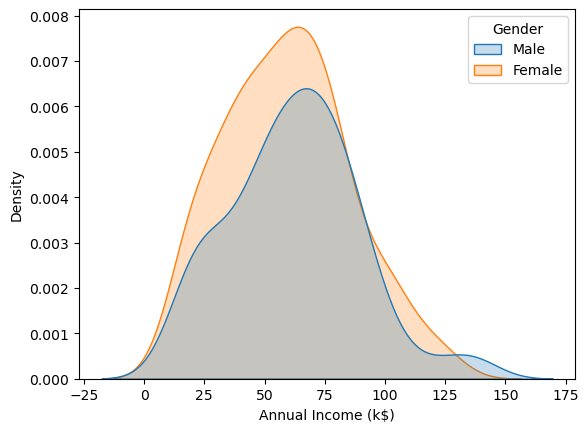

In [16]:
#Kernel density estimate plot
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", shade=True)


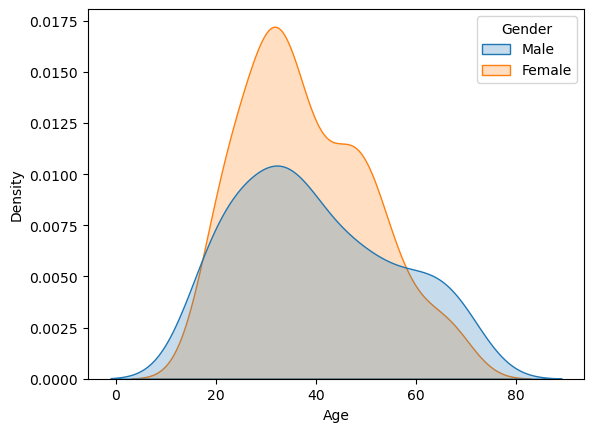

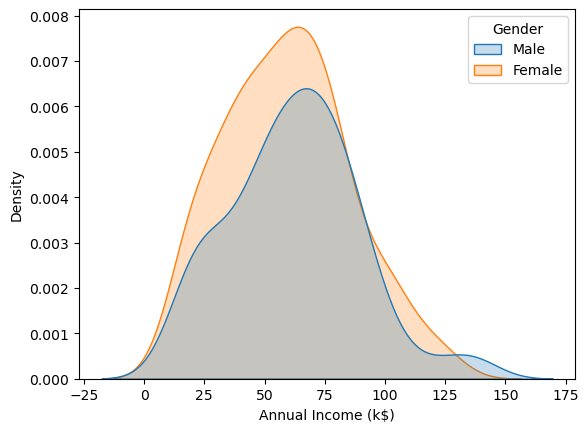

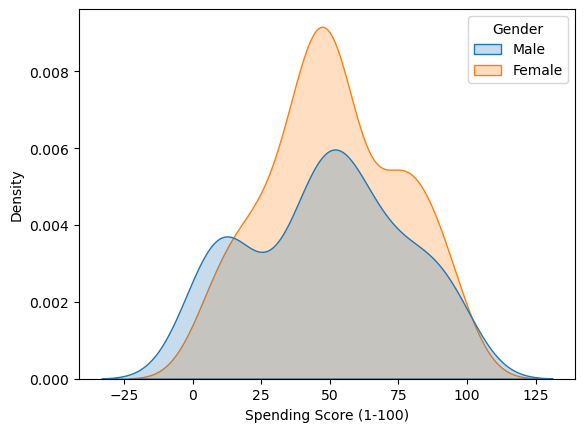

In [17]:
columns=[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df,x=i,hue="Gender", shade=True)

A box plot (also called a whisker plot) is a graphical representation of the distribution of a dataset that shows its minimum, first quartile (Q1)
, median (Q2), third quartile (Q3), and maximum, along with any outliers.

📌 Purpose of a Box Plot

✅ To summarize data distribution visually using five-number summary.

✅ To identify skewness (whether the data is symmetric or skewed).

✅ To detect outliers easily.

✅ To compare distributions across different categories.

Key Components:

Box → Represents the interquartile range (IQR = Q3 − Q1).

Line inside the box → Median (Q2).

Whiskers → Extend to the minimum and maximum values within 1.5×IQR.

Dots outside whiskers → Outliers.

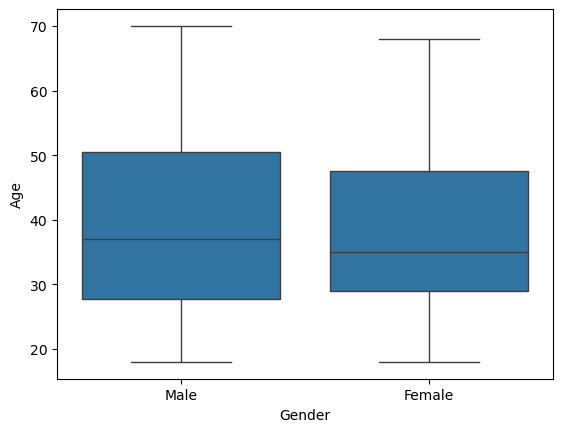

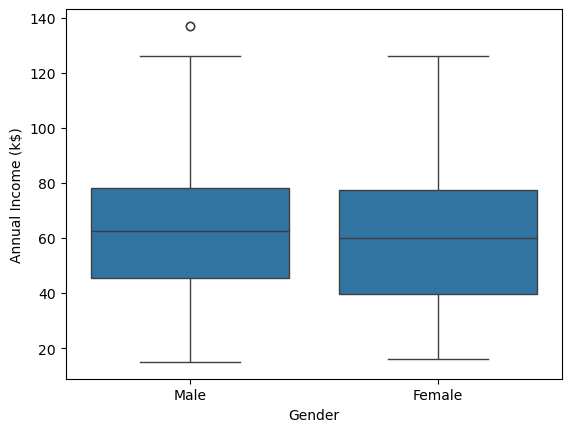

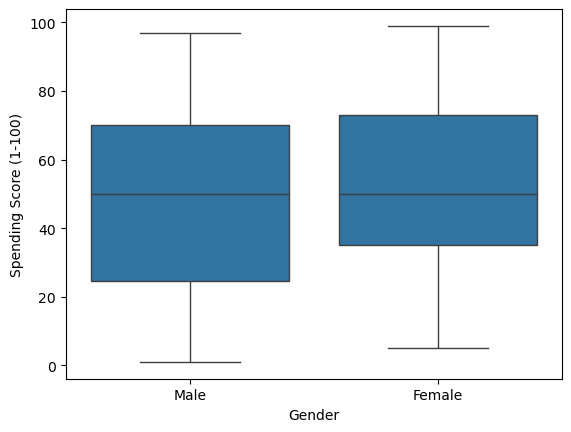

In [18]:
columns=[ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x=df["Gender"],y=df[i])

In [19]:
df["Gender"].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

**BIVARIATE ANALYSIS**

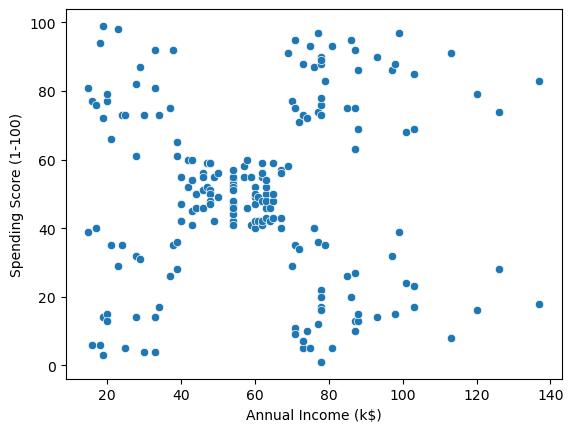

In [20]:
#bivariate clustering
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)');

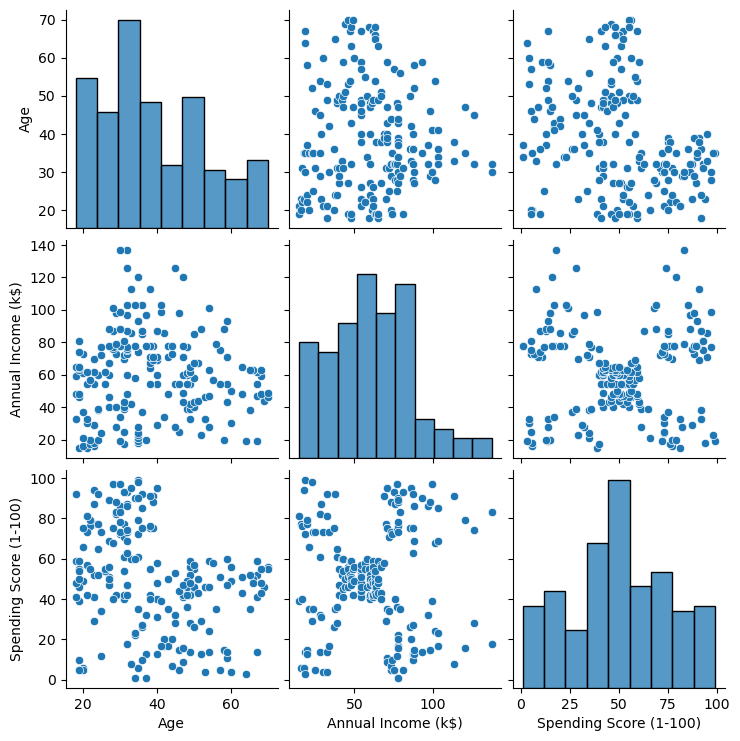

In [21]:
df=df.drop('CustomerID',axis=1)
sns.pairplot(df)

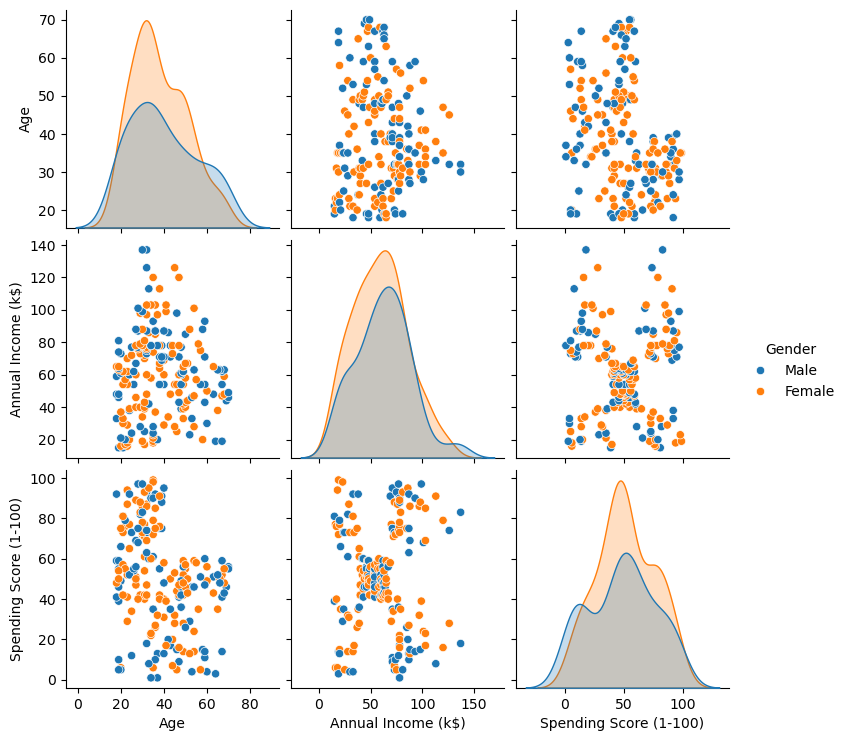

In [22]:
sns.pairplot(data=df,hue='Gender')

In [23]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [24]:
df.corr(numeric_only=True)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


**cmap in Python (especially in Matplotlib and Seaborn) stands for color map.**

It decides the color scheme that will be used in a plot (like heatmaps, scatter plots, contour plots, etc.).

📌 Commonly Used cmap Options

cmap Value	Color Scheme Description

"viridis"	Default Matplotlib colormap (green → yellow → purple)

"plasma"	Bright purple → yellow

"inferno"	Dark → yellow-orange-red

"magma"	Dark purple → red

"coolwarm"	Blue → White → Red (good for correlations)

"Blues"	Light blue → Dark blue

"Reds"	Light red → Dark red

"Greens"	Light green → Dark green

<Axes: >

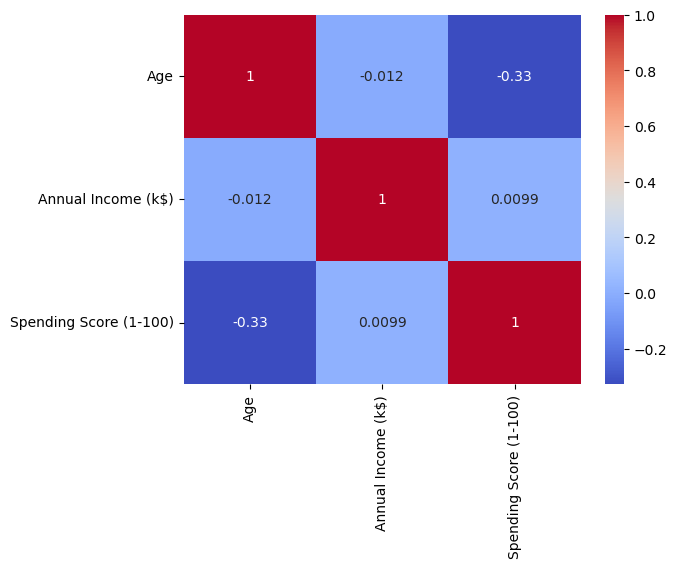

In [25]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

**Clustering univariate,bivariate,multivariate**


In [26]:
clustering1=KMeans(n_clusters=3)

In [52]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [28]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [29]:
df['Income clusters']=clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,0
3,Female,23,16,77,0
4,Female,31,17,40,0


In [30]:
df['Income clusters'].value_counts()

Income clusters
2    86
0    58
1    56
Name: count, dtype: int64

In [31]:
clustering1.inertia_

25640.457784396836

In [32]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [33]:
inertia_scores

[137277.27999999997,
 48660.88888888889,
 25341.285871863227,
 15460.429512270888,
 10175.918627450981,
 5468.858011695907,
 3936.796825396826,
 3000.288239538239,
 2566.909090909091,
 1859.4027777777778]

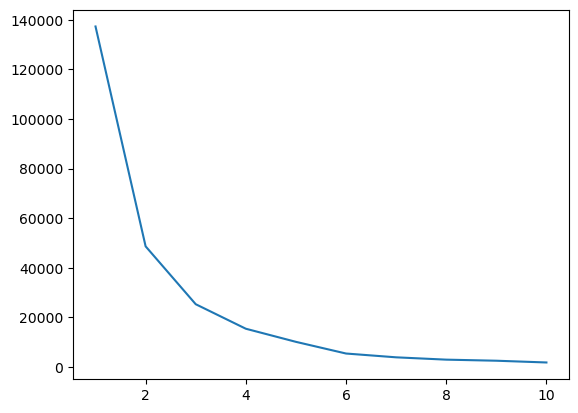

In [34]:
plt.plot(range(1,11),inertia_scores)

In [35]:
df.columns


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income clusters'],
      dtype='object')

In [36]:
df.groupby('Income clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income clusters,,,
0,37.120690,29.551724,49.689655
1,36.910714,92.142857,50.517857
2,41.279070,60.906977,50.337209


**Bivariate clustering**


In [37]:
clustering2=KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income cluster']=clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


In [38]:
clustering2.inertia_

44448.45544793371

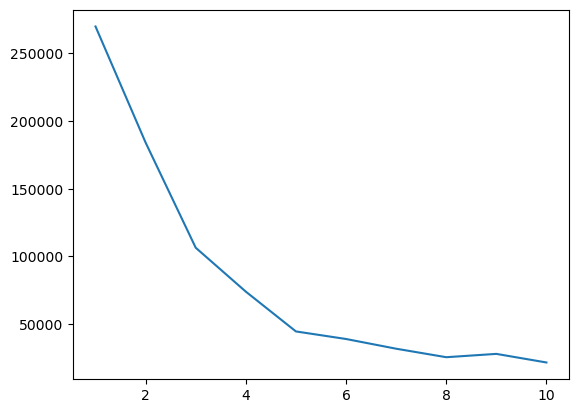

In [39]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2)

In [43]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']

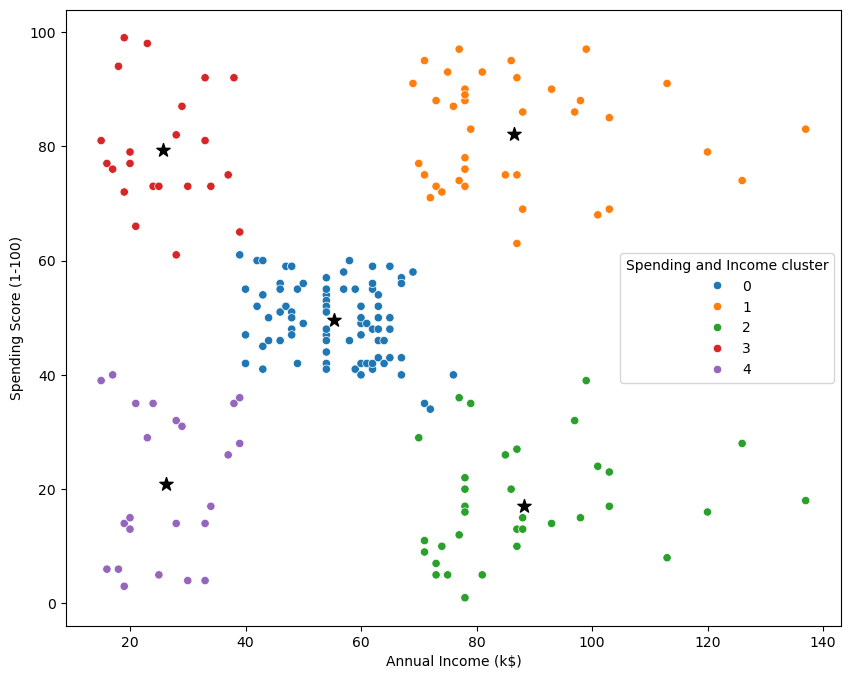

In [84]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c="black",marker="*")
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income cluster',palette='tab10')
plt.savefig('clustering_bivariate.png')

In [51]:
pd.crosstab(df['Spending and Income cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income cluster,,
0,0.592593,0.407407
1,0.538462,0.461538
2,0.457143,0.542857
3,0.590909,0.409091
4,0.608696,0.391304


In [54]:
df.groupby('Spending and Income cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,25.272727,25.727273,79.363636
4,45.217391,26.304348,20.913043


**multivariate clustering**

In [55]:
from sklearn.preprocessing import StandardScaler

In [57]:
scale=StandardScaler()

In [76]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4


In [77]:
dff=pd.get_dummies(df,drop_first=True)
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster,Gender_Male
0,19,15,39,0,4,True
1,21,15,81,0,3,True
2,20,16,6,0,4,False
3,23,16,77,0,3,False
4,31,17,40,0,4,False


In [78]:
dff.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income clusters', 'Spending and Income cluster', 'Gender_Male'],
      dtype='object')

In [79]:
dff=dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [82]:
dff=pd.DataFrame(scale.fit_transform(dff))
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


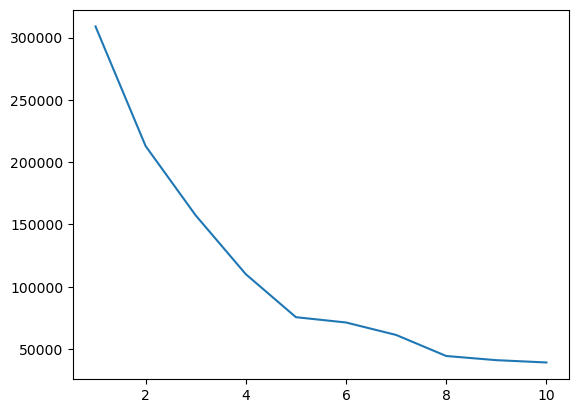

In [80]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3)

In [83]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Income clusters,Spending and Income cluster
0,Male,19,15,39,0,4
1,Male,21,15,81,0,3
2,Female,20,16,6,0,4
3,Female,23,16,77,0,3
4,Female,31,17,40,0,4
5,Female,22,17,76,0,3
6,Female,35,18,6,0,4
7,Female,23,18,94,0,3
8,Male,64,19,3,0,4
9,Female,30,19,72,0,3


In [86]:
df.to_csv('Clustering_csv')